# LSTM2

In [4]:
# 모듈로딩
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Bidirectional
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

## [ 학습 함수 ]
---

In [2]:
# [ 학습 함수 ]
# ex: data = [1,2,3,4,5,6,7,8,9,10]가 주어졌을 때 generateX(data, 5)를 실행하면
# 아래와 같은 학습데이터 변환한다.
#
# x                      y
# ---------              -
# 1,2,3,4,5              6
# 2,3,4,5,6              7
# 3,4,5,6,7              8
# ...

# a= data, n = 학습할 과거 데이터 수
# --> 예측값 개수 : 전체 데이터 갯수 - n (앞쪽데이터 n개가 제외됨)
def generateX(a, n): # a=data, n=5
    x_train = []
    y_train = []
    for i in range(len(a)): # i = 0~9 
        x = a[i:(i + n)] # x : 0~4,1~5,2~6,3~7,4~8,5~9...9~14
        if (i + n) < len(a):
            x_train.append(x) # x_train = 0~4,1~5,2~6,3~7,4~8까지
            y_train.append(a[i + n]) # y_train = 5,6,7,8,9
        else:
            break
    return np.array(x_train), np.array(y_train)

In [7]:
# Sine 함수에 노이즈를 섞은 데이터로 학습 데이터 100개를 생성한다
data = np.sin(2 * np.pi * 0.03 * np.arange(0, 100)) + np.random.random(100)
x, y = generateX(data, 10)

# 차원 하나씩 추가
x = x.reshape(-1,10,1)
y = y.reshape(-1,1)
x.shape

(90, 10, 1)

In [ ]:
# 학습용 데이터와 시험용 데이터
x_train = x[:70, :, :]
y_train = y[:70, :]
x_test = x[70:, :, :]
y_test = y[70:, :]

Epoch 1/500
4/4 [==============================] - 4s 7ms/step - loss: 1.0485
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 0.9663
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 0.9007
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 0.8294
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 0.7676
Epoch 6/500
4/4 [==============================] - 0s 6ms/step - loss: 0.7090
Epoch 7/500
4/4 [==============================] - 0s 5ms/step - loss: 0.6524
Epoch 8/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6116
Epoch 9/500
4/4 [==============================] - 0s 6ms/step - loss: 0.5735
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 0.5491
Epoch 11/500
4/4 [==============================] - 0s 6ms/step - loss: 0.5305
Epoch 12/500
4/4 [==============================] - 0s 5ms/step - loss: 0.5264
Epoch 13/500
4/4 [==============================] - 0s 8ms/st

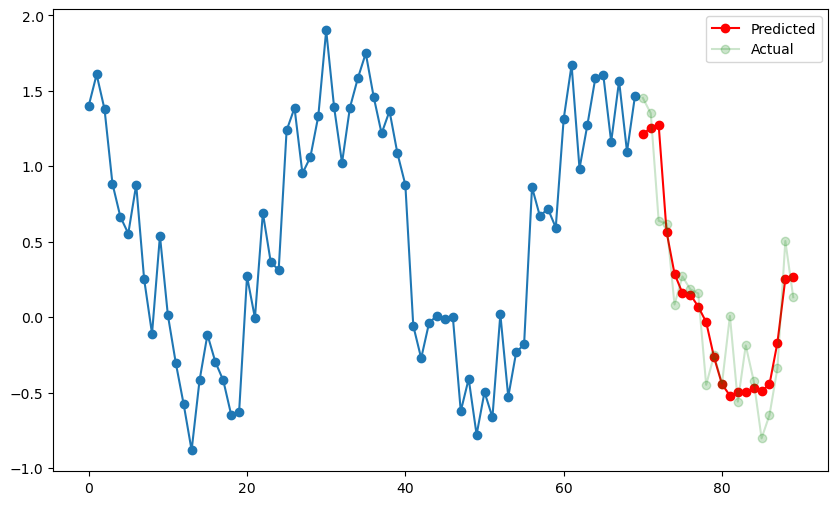

In [1]:
# 2층-양방항 구조의 LSTM 모델을 생성한다.
K.clear_session()     # 모델 생성전에 tensorflow의 graph 영역을 clear한다.
xInput = Input(batch_shape=(None, x_train.shape[1], x_train.shape[2]))
xLstm_1 = LSTM(10, return_sequences = True)(xInput)
xLstm_2 = Bidirectional(LSTM(10))(xLstm_1)
xOutput = Dense(1)(xLstm_2)


model = Model(xInput, xOutput)
model.compile(loss='mse', optimizer='adam')



# 학습
model.fit(x_train, y_train, epochs=500, batch_size=20,verbose=1)



# 예측
y_hat = model.predict(x_test, batch_size=1)



# 예측 결과 시각화
a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(10,6))
plt.plot(a_axis, y_train.reshape(70,), 'o-')
plt.plot(b_axis, y_hat.reshape(20,), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test.reshape(20,), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()

